In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def backTrack1(x, z, t, y, f, df, d, alpha0=1., c=1e-3, r=0.9, maxI=1000, sig=1.):
    alpha = alpha0
    counter = 0
    fin = 0
    
    while not fin:     
        gf = df(t, x, sig, z, y)
        print(gf.shape, d.shape)
        if (f(t, x - alpha*d, sig, z, y) <= f(t, x, sig, z, y) - c*alpha*(gf@d)):
            fin = 1
        if (counter >= maxI): fin = 1
        alpha = r*alp
        counter = counter + 1
        
    return alpha, counter


def backTrack2(x, z, t, y, f, df, d, alpha0=1., c=1e-3, r=0.9, maxI=1000, sig=1.):
    alpha = alpha0
    counter = 0
    fin = 0
    
    while not fin:        
        gf = df(t, x, sig, z, y)
        print(gf.shape, d.shape)
        if (f(t, x, sig, z - alpha*d, y) <= f(t, x, sig, z, y) - c*alpha*(gf@d)):
            fin = 1
        if (counter >= maxI): fin = 1
        alpha = r*alpha
        counter = counter + 1
        
    return alpha, counter

In [3]:
def CoordDescent(x0, z0, t, y, f, df1, df2, alpha0=1., maxI=1000, eps=1e-3, crit='abserrorx', c=1e-3, r=0.9, sig=1.):
    iters = 0
    fin = 0
    convergence = 0
    x = x0.copy()
    z = z0.copy()
    n = x.shape[0]

    xk = []
    zk = []
    fk = []
    df1k = []
    df2k = []
    errk = []
    #bk = [0]
    xk.append(x)
    zk.append(z)
    fk.append(f(t, x, sig, z, y))
    df1k.append(df1(t, x, sig, z, y))
    df2k.append(df2(t, x, sig, z, y))
    errk.append(np.linalg.norm(xk, 1))
    alpha = alpha0
    
    while not fin:
        #alpha, ct = backtracking(x, f, df, gr, alpha0, c, r)   
        
        #step 1: mus
        oldx = x
        gr1 = df1(t, x, sig, z, y)
        #alpha, ct = backTrack1(x, z, t, y, f, df1, gr1, alpha0, c, r, 1000, sig)   
        x = oldx - alpha*gr1
        fx = f(t, x, sig, z, y)
        dfx1 = df1(t, x, sig, z, y)
        
        #step 1: coefs
        oldz = z
        gr2 = df2(t, x, sig, z, y)
        #alpha, ct = backTrack2(x, z, t, y, f, df2, gr2, alpha0, c, r, 1000, sig)   
        z = oldz - alpha*gr2
        fx = f(t, x, sig, z, y)
        dfx2 = df2(t, x, sig, z, y)
        
        iters += 1
        xk.append(x)
        zk.append(z)
        fk.append(f(t, x, sig, z, y))
        df1k.append(df1(t, x, sig, z, y))
        df2k.append(df2(t, x, sig, z, y))
        #bk.append(ct)
        
        if (crit == 'abserrorx'):
            error = np.linalg.norm(oldz-z)
        elif (crit == 'relerrorx'):
            error = np.linalg.norm(oldz-z)/np.linalg.norm(z)
        elif (crit == 'relerrorf'):
            foldz = f(t, x, sig, z, y)
            error = np.abs(foldz-fx)/np.abs(fx)
        elif (crit == 'normdf'):
            error = np.linalg.norm(dfx1)
        else:
            error = -1.
            fin = 1
        if (error < eps):
            fin = 1
            convergence = 1
        errk.append(error)      
        if(iters >= maxI): fin = 1

    bestx = x
    bestz = z
    xk = np.array(xk)
    zk = np.array(zk)
    fk = np.array(fk)
    df1k = np.array(df1k)
    df2k = np.array(df2k)
    errk = np.array(errk)
    return [bestx, bestz, xk, zk, fk, df1k, df2k, errk, convergence, iters]

## Functions

In [4]:
def ker(x, mu, sig):
    M, X = np.meshgrid(mu, x)
    f = np.exp(-(X-M)**2/(2.*sig**2))
    return f

def dker(x, mu, sig):
    M, X = np.meshgrid(mu, x)
    f = (X-M)/(sig**2)
    return f

In [5]:
def F(x, mu, sig, c):
    f = ker(x, mu, sig) @ c
    return f

def dF1(x, mu, sig, c):
    K = ker(x, mu, sig)
    dK = dker(x, mu, sig)
    df = (K * dK) @ c
    return df

def dF2(x, mu, sig, c):
    K = ker(x, mu, sig)
    df = K.sum(axis=1)
    return df

In [6]:
def E(x, mu, sig, c, y):
    f = ((F(x, mu, sig, c) - y)**2).sum()
    return f

def dE1(x, mu, sig, c, y):
    K = ker(x, mu, sig)
    #df = 2. * (F(x, mu, sig, c) - y) @ dF1(x, mu, sig, c)
    df = 2. * (dF1(x, mu, sig, c)) @ (K@c - y)
    return df
    
def dE2(x, mu, sig, c, y):
    K = ker(x, mu, sig)
    df = 2. * (K.T) @ (K@c - y)
    return df

## Test

In [7]:
t = np.linspace(0, 10, 101)
#y = 4 + np.cos(2.1*t - 3.4) + 3.*np.sin(0.7*t + 5.1)
y = 7 - np.sin(3.1*t - 2.4) - 1.*np.sin(1.7*t + 2.1)

In [8]:
k = 10
t0 = t[0]
tf = t[-1]
dh = 1. * (tf - t0) / k

mu0 = np.linspace(t0, t0 + (k-1)*dh, k, endpoint=True) + 0.5*dh

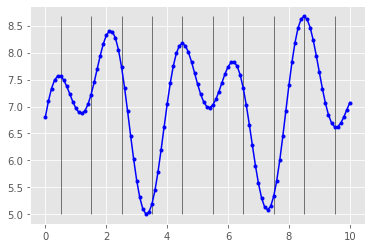

In [9]:
plt.figure()
plt.style.use('ggplot')
plt.plot(t, y, 'b.')
plt.plot(t, y, 'b-')
plt.vlines(mu0, ymin=y.min(), ymax=y.max(), lw=0.5)
plt.show()

In [10]:
mu0

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [19]:
c0 = np.ones(k)

alpha0 = 0.001
maxI = 20000
eps = 1e-4
c = 5e-2
r = 0.5
sig = 1.

In [20]:
mu, coef, xk, zk, fk, df1k, df2k, errk, conv, it = CoordDescent(mu0, c0, t, y, E, dE1, dE2, alpha0, maxI, eps, 'abserrorx', c, r, sig)

In [21]:
print(conv, it)

0 20000


In [22]:
mu

array([0.20237414, 1.20237414, 2.20237414, 3.20237414, 4.20237414,
       5.20237414, 6.20237414, 7.20237414, 8.20237414, 9.20237414])

In [23]:
coef

array([ 8.80008034, -5.31034624, 13.4565959 , -8.08478568, 10.49787848,
       -1.92545395,  7.19012669, -1.25110735,  3.45735585,  6.09174349])

#### $\lambda = 1$

In [24]:
yhat = F(t, mu, sig, coef)

In [25]:
yhat

array([7.18817521, 7.27463147, 7.31364001, 7.31259961, 7.28105085,
       7.23007359, 7.17153108, 7.11721135, 7.07792936, 7.06266212,
       7.07779075, 7.12651926, 7.20852883, 7.31990865, 7.45338267,
       7.5988262 , 7.74404074, 7.87573087, 7.98060723, 8.04652564,
       8.06356604, 8.02495762, 7.92776738, 7.7732883 , 7.56708846,
       7.31871149, 7.04104943, 6.74943754, 6.46054572, 6.19115875,
       5.95694757, 5.77133392, 5.64454189, 5.58291265, 5.5885346 ,
       5.6592128 , 5.78877148, 5.96765475, 6.1837654 , 6.42346289,
       6.67263059, 6.91771932, 7.14668041, 7.34971505, 7.51978604,
       7.65286234, 7.74789175, 7.80652226, 7.83261377, 7.83159902,
       7.80976274, 7.77351184, 7.72870569, 7.68010627, 7.630993  ,
       7.58296897, 7.53596594, 7.48843587, 7.43770008, 7.38041344,
       7.31309258, 7.23265321, 7.1369039 , 7.02494976, 6.89746998,
       6.75684637, 6.607134  , 6.45387963, 6.30380626, 6.1643923 ,
       6.04338151, 5.94826309, 5.88576154, 5.86137266, 5.87897

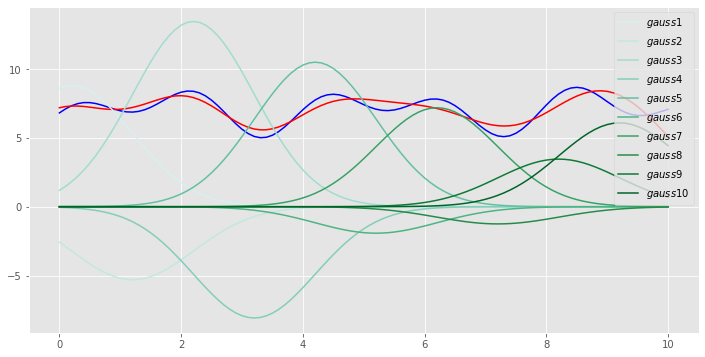

In [26]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
plt.plot(t, y, 'b-')
plt.plot(t, yhat, 'r-')
for i in range(0, len(coef)):
    Ki = ker(t, mu[i], sig)
    #plt.plot(t, Ki)
    plt.plot(t, coef[i]*Ki, label=r'$gauss{}$'.format(i+1), c=plt.cm.BuGn(50 + 20*i))
plt.legend()
plt.show()

In [309]:
E(t, mu, sig, coef, y)

1.303582544522098

In [ ]:
0.5014450765079135